In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bss
import ffttools as fftt

plt.rcParams.update({'font.size': 14})

## 6. BSS with pictures

In this finale section, some of the BSS methods that we saw are tested on a mixture of pictures.

Let us load three pictures and plot them.

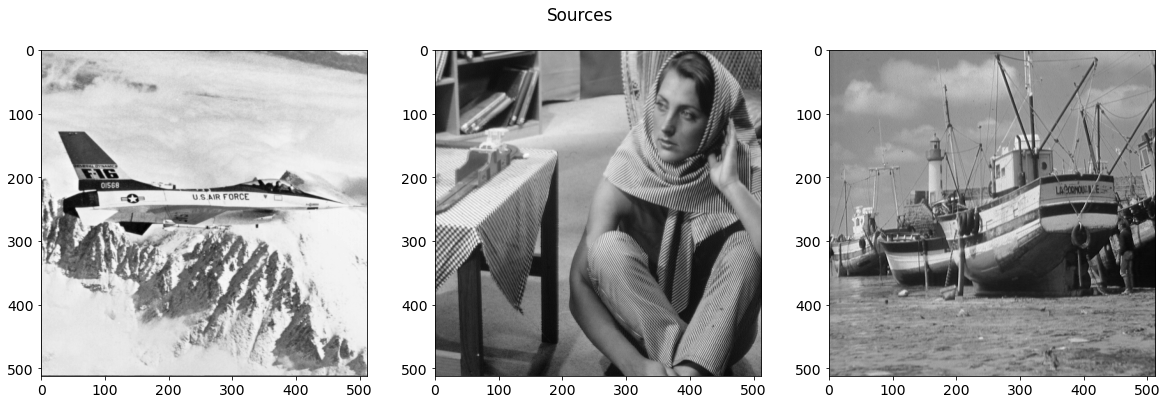

In [2]:
images = ['img/airplane.png', 'img/barbara.png', 'img/boat.png']
n = 3        # number of sources
p = 512**2   # number of samples

S = np.zeros((n, p))

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources')
for i in range(n):
    s = plt.imread(images[i])
    fig.add_subplot(1,3,i+1)
    plt.imshow(s, cmap=plt.get_cmap("gray"))
    S[i, :] = s.flatten()

The pictures are non-negative (and so is the mixing matrix which will be generated later). Thus, NMF methods can be used.

The pictures are not sparse. However, they are approximately sparse in the starlet domain (undecimated wavelet transform). Below are the histograms of the sources in the starlet space.

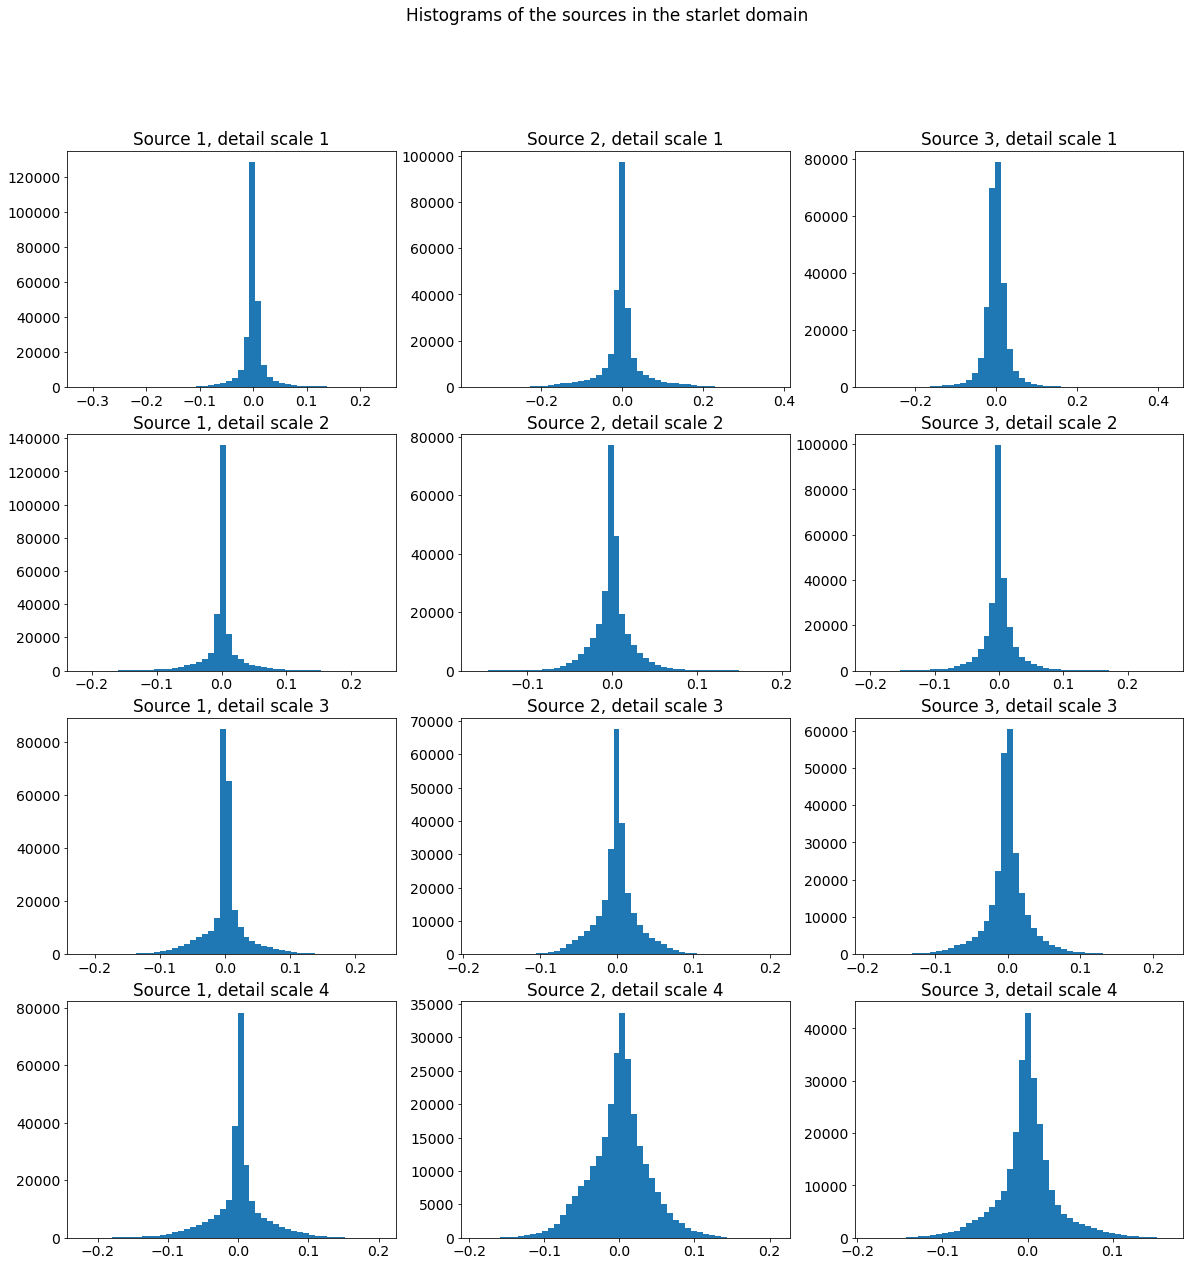

In [3]:
nscales = 4
S_wt = fftt.wt_trans(S, nscales=nscales)

fig = plt.figure(figsize=(20, 20))
plt.suptitle('Histograms of the sources in the starlet domain')
k = 0
for j in range(nscales):
    for i in range(n):
        k += 1
        fig.add_subplot(nscales, n, k)
        plt.hist(S_wt[i, :, j], bins=50)
        plt.title("Source %i, detail scale %i" % (i+1, j+1))

Let us generate 6 observations.

Mixing matrix condition number: 4.38


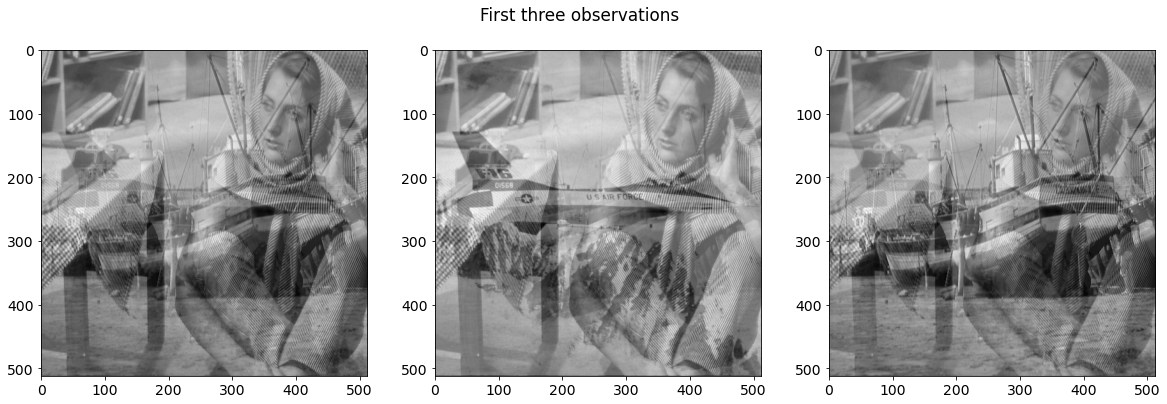

In [4]:
m = 2*n
while True:
    A = np.random.rand(m, n)
    if np.linalg.cond(A)<=5:
        break
print('Mixing matrix condition number: %.2f' % np.linalg.cond(A))

noise_level = 120

N = np.random.randn(m, p)
X = A@S + N*np.linalg.norm(S)*10**(-noise_level/20)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('First three observations')
for i in range(np.minimum(m, 3)):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(X[i, :], (512, 512)), cmap=plt.get_cmap("gray"))

Let us run and compare FastICA, the multiplicative update algorithm (NMF) and GMCA in the starlet domain.

Performances of ICA:
- NMSE: 4.98
- CA: 6.87


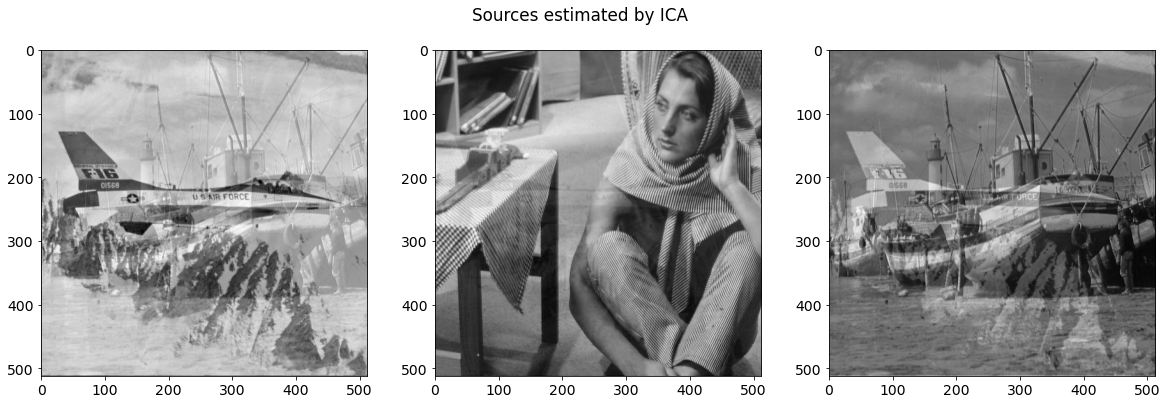

In [5]:
A_fpica, S_fpica = bss.fastica(X, n)
S_fpica = np.linalg.pinv(A_fpica)@X

bss.corr_perm(A, S, A_fpica, S_fpica, inplace=True)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources estimated by ICA')
for i in range(n):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(S_fpica[i, :], (512, 512)), cmap=plt.get_cmap("gray"))

print("Performances of ICA:\n- NMSE: %.2f\n- CA: %.2f" % (bss.nmse(S, S_fpica), bss.ca(A, A_fpica)))

Performances of multiplicative update algorithm:
- NMSE: 15.53
- CA: 6.61


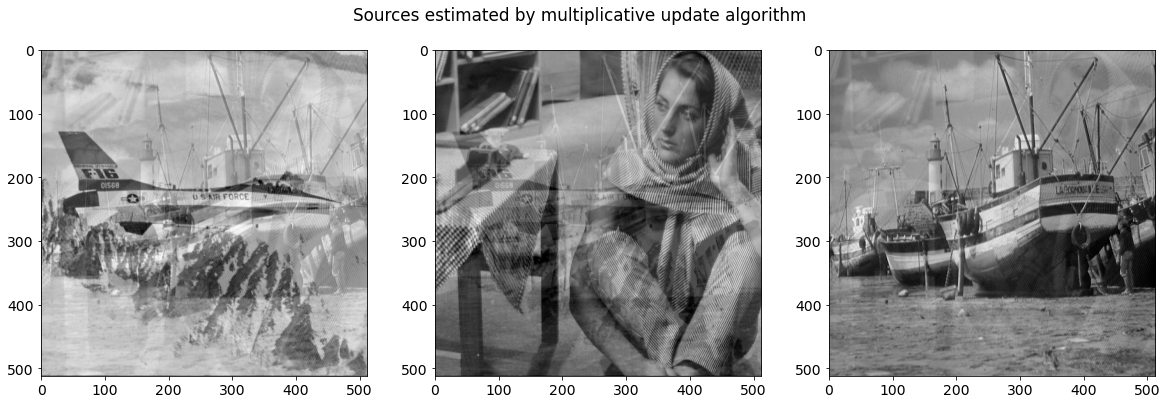

In [6]:
A_mu, S_mu = bss.multiplicative_update(X, n, nbIt=2000)

bss.corr_perm(A, S, A_mu, S_mu, inplace=True)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources estimated by multiplicative update algorithm')
for i in range(n):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(S_mu[i, :], (512, 512)), cmap=plt.get_cmap("gray"))
    
print("Performances of multiplicative update algorithm:\n- NMSE: %.2f\n- CA: %.2f" % (bss.nmse(S, S_mu), bss.ca(A, A_mu)))

Performances of GMCA:
- NMSE: 33.06
- CA: 22.12


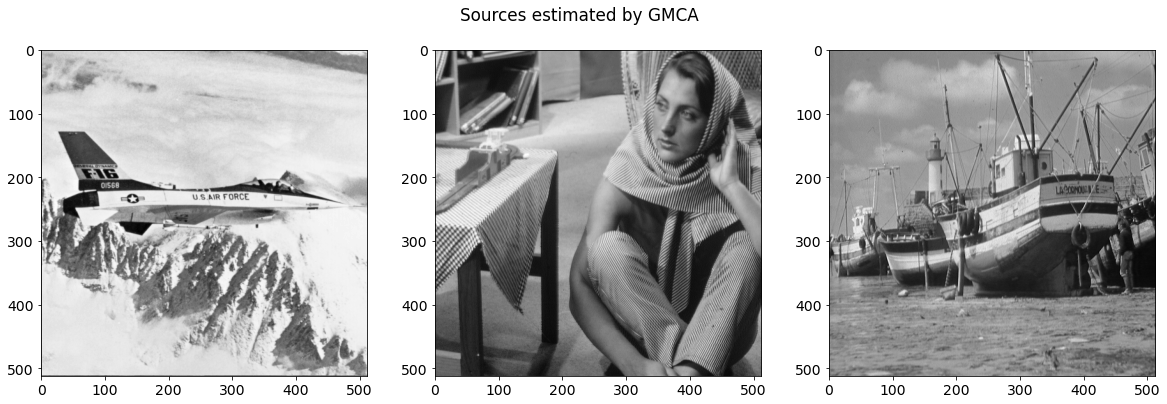

In [7]:
A_gmca, S_gmca = bss.gmca_starlet2(X, n=n, nscales=4)
bss.corr_perm(A, S, A_gmca, S_gmca, inplace=True)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources estimated by GMCA')
for i in range(n):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(S_gmca[i, :], (512, 512)), cmap=plt.get_cmap("gray"))
    
print("Performances of GMCA:\n- NMSE: %.2f\n- CA: %.2f" % (bss.nmse(S, S_gmca), bss.ca(A, A_gmca)))

Let us finally see how these methods behave in the presence of noise.

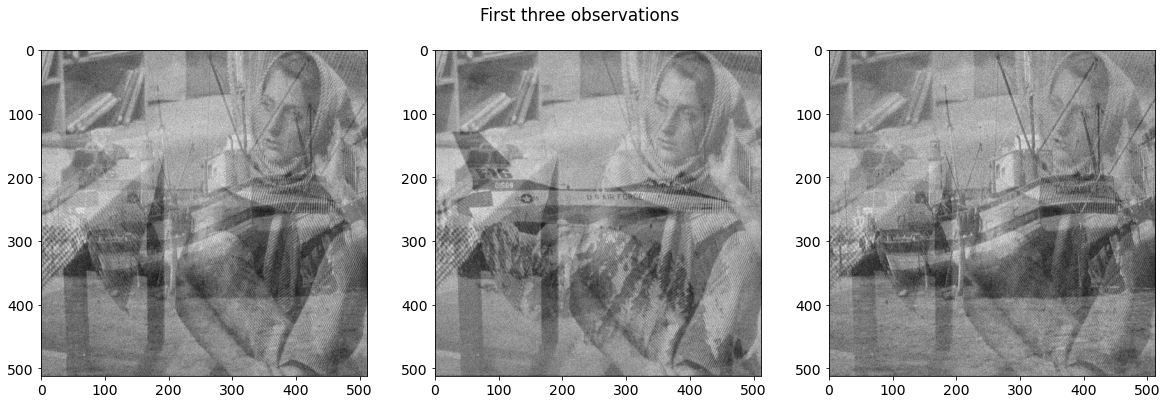

In [8]:
noise_level = 75

N = np.random.randn(m, p)
X = A@S + N*np.linalg.norm(S)*10**(-noise_level/20)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('First three observations')
for i in range(np.minimum(m, 3)):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(X[i, :], (512, 512)), cmap=plt.get_cmap("gray"))

Performances of ICA:
- NMSE: 5.53
- CA: 7.10


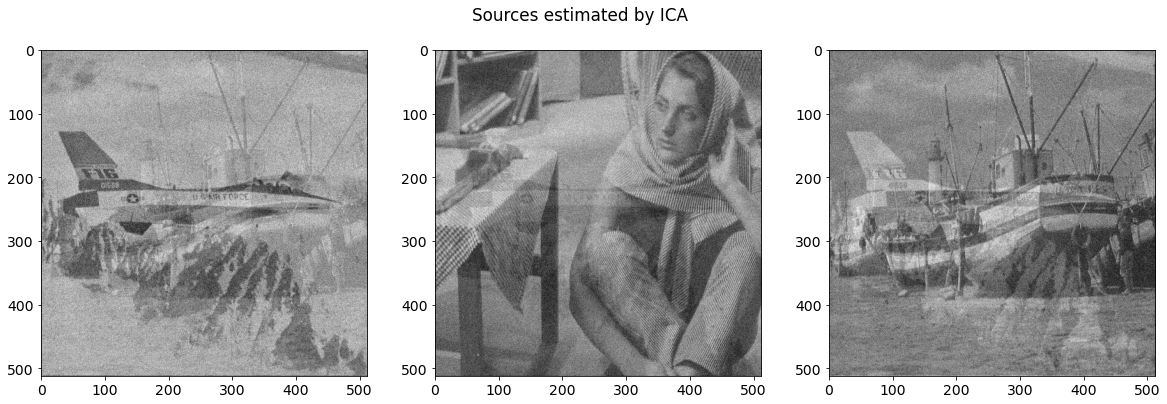

In [9]:
A_fpica, S_fpica = bss.fastica(X, n)
S_fpica = np.linalg.pinv(A_fpica)@X

bss.corr_perm(A, S, A_fpica, S_fpica, inplace=True)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources estimated by ICA')
for i in range(n):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(S_fpica[i, :], (512, 512)), cmap=plt.get_cmap("gray"))

print("Performances of ICA:\n- NMSE: %.2f\n- CA: %.2f" % (bss.nmse(S, S_fpica), bss.ca(A, A_fpica)))

Performances of multiplicative update algorithm:
- NMSE: 12.07
- CA: 8.90


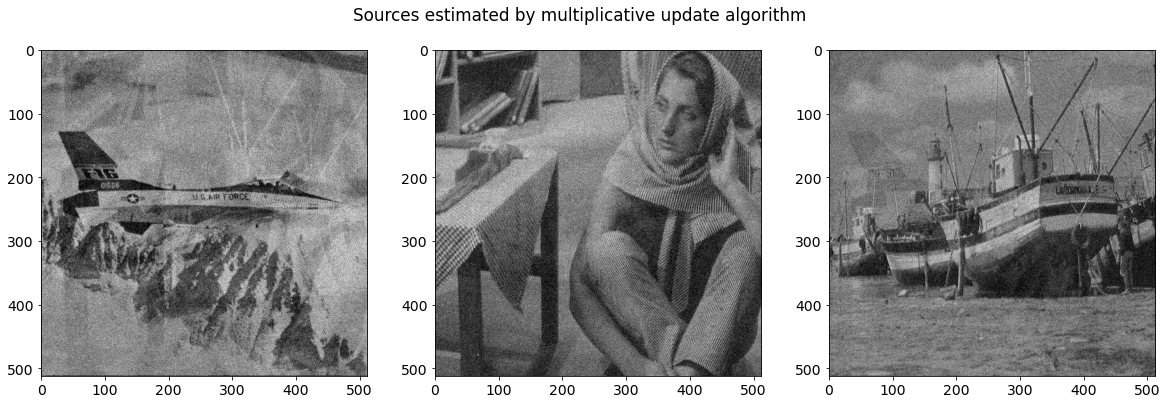

In [10]:
A_mu, S_mu = bss.multiplicative_update(X, n, nbIt=2000)

bss.corr_perm(A, S, A_mu, S_mu, inplace=True)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources estimated by multiplicative update algorithm')
for i in range(n):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(S_mu[i, :], (512, 512)), cmap=plt.get_cmap("gray"))
    
print("Performances of multiplicative update algorithm:\n- NMSE: %.2f\n- CA: %.2f" % (bss.nmse(S, S_mu), bss.ca(A, A_mu)))

Performances of GMCA:
- NMSE: 13.45
- CA: 11.75


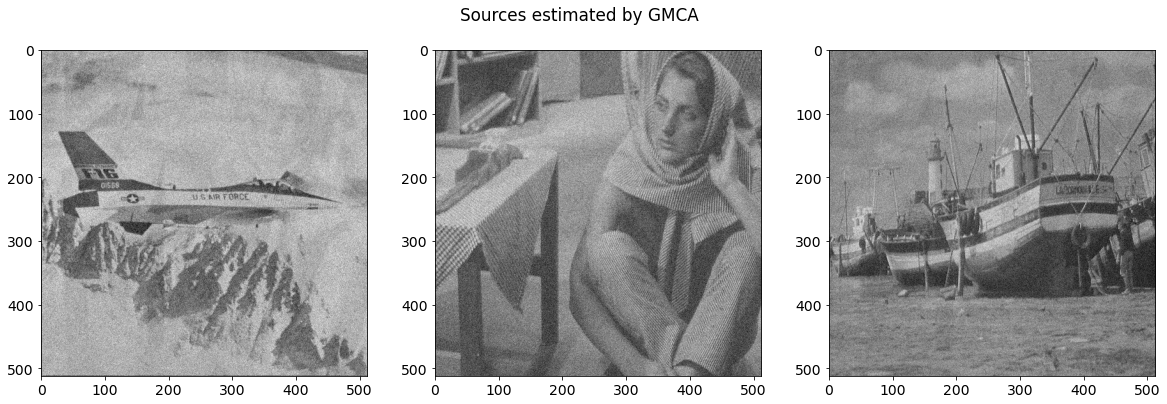

In [11]:
A_gmca, S_gmca = bss.gmca_starlet2(X, n=n, nscales=4)
bss.corr_perm(A, S, A_gmca, S_gmca, inplace=True)

fig = plt.figure(figsize=(20, 6))
plt.suptitle('Sources estimated by GMCA')
for i in range(n):
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.reshape(S_gmca[i, :], (512, 512)), cmap=plt.get_cmap("gray"))
    
print("Performances of GMCA:\n- NMSE: %.2f\n- CA: %.2f" % (bss.nmse(S, S_gmca), bss.ca(A, A_gmca)))